### **Problem Statement:**

The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on the Zomato Dataset and build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features.

### **Approach:**

The classical machine learning tasks like Data Exploration, Data Cleaning,Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

### **Results:**

You have to build a solution that should able to predict the ratings of the restaurants listed in the dataset.

###Import Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

###Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Ineuron Internship/Machine Learning/zomato.csv')

## **Data Preparartion**

### Print first and last five rows

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [6]:
df['menu_item'].value_counts()

menu_item
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Shape of Dataset

In [7]:
print(df.shape)

(51717, 17)


* Dataset contains 51717 rows and 17 columns

###Count datatype of columns

In [8]:
# Select columns of each data type
int_columns = df.select_dtypes(include=['int64'])
float_columns = df.select_dtypes(include=['float64'])
object_columns = df.select_dtypes(include=['object'])

# Print the number of columns in each category
print(f"Integer Columns: {int_columns.shape[1]} columns")
print(f"Float Columns: {float_columns.shape[1]} columns")
print(f"Object Columns: {object_columns.shape[1]} columns")

Integer Columns: 1 columns
Float Columns: 0 columns
Object Columns: 16 columns


* The dataset contains one integer column, zero float column and 16 object columns

###Describe about columns

In [9]:
df.describe(include='all')

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check for null values

Missing value
dish_liked                     28078
rate                            7775
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Missing value in percentage
dish_liked                     54.29
rate                           15.03
phone                           2.34
approx_cost(for two people)     0.67
rest_type                       0.44
cuisines                        0.09
location                        0.04
dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------


<Axes: >

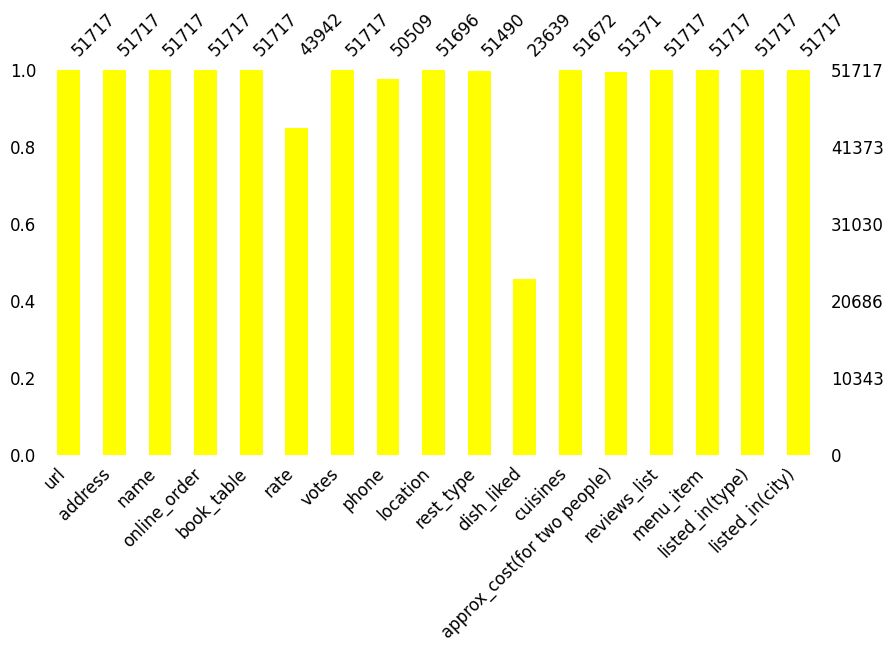

In [10]:
def missing_value():
  missing=df.columns[df.isnull().any()].tolist()
  return missing
print("Missing value")
print(df[missing_value()].isnull().sum().sort_values(ascending=False))
print('---'*50)
print('Missing value in percentage')
print(round(df[missing_value()].isnull().sum().sort_values(ascending=False)/len(df)*100,2))
print('---'*50)
msno.bar(df,color = 'yellow',figsize=(10,5), fontsize=12)

* There are some null values. Dish_liked column contain 54%, rate column contain 15%, phone column contain 2% and rest columns approx_cost, rest_type, cuisines, location columns has less than 1%.

In [11]:
df = df.drop('dish_liked', axis=1)

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

### Exploratory Data Analysis

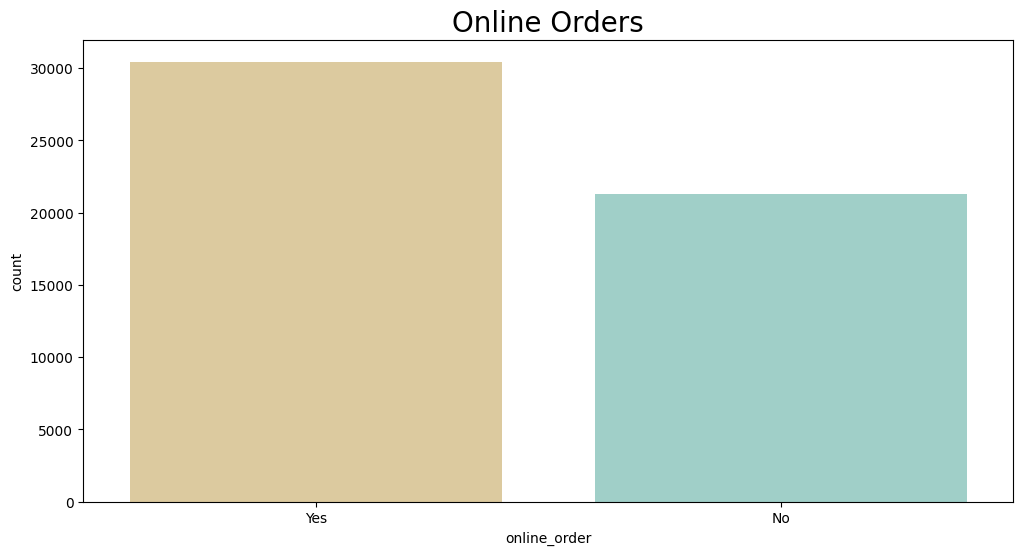

In [15]:
# online orders distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=df['online_order'],palette='BrBG')
plt.title('Online Orders',fontsize=20)
plt.show()

* Online orders are more compare to offilne orders. (almost 30000 orders are online and 23000 offline)

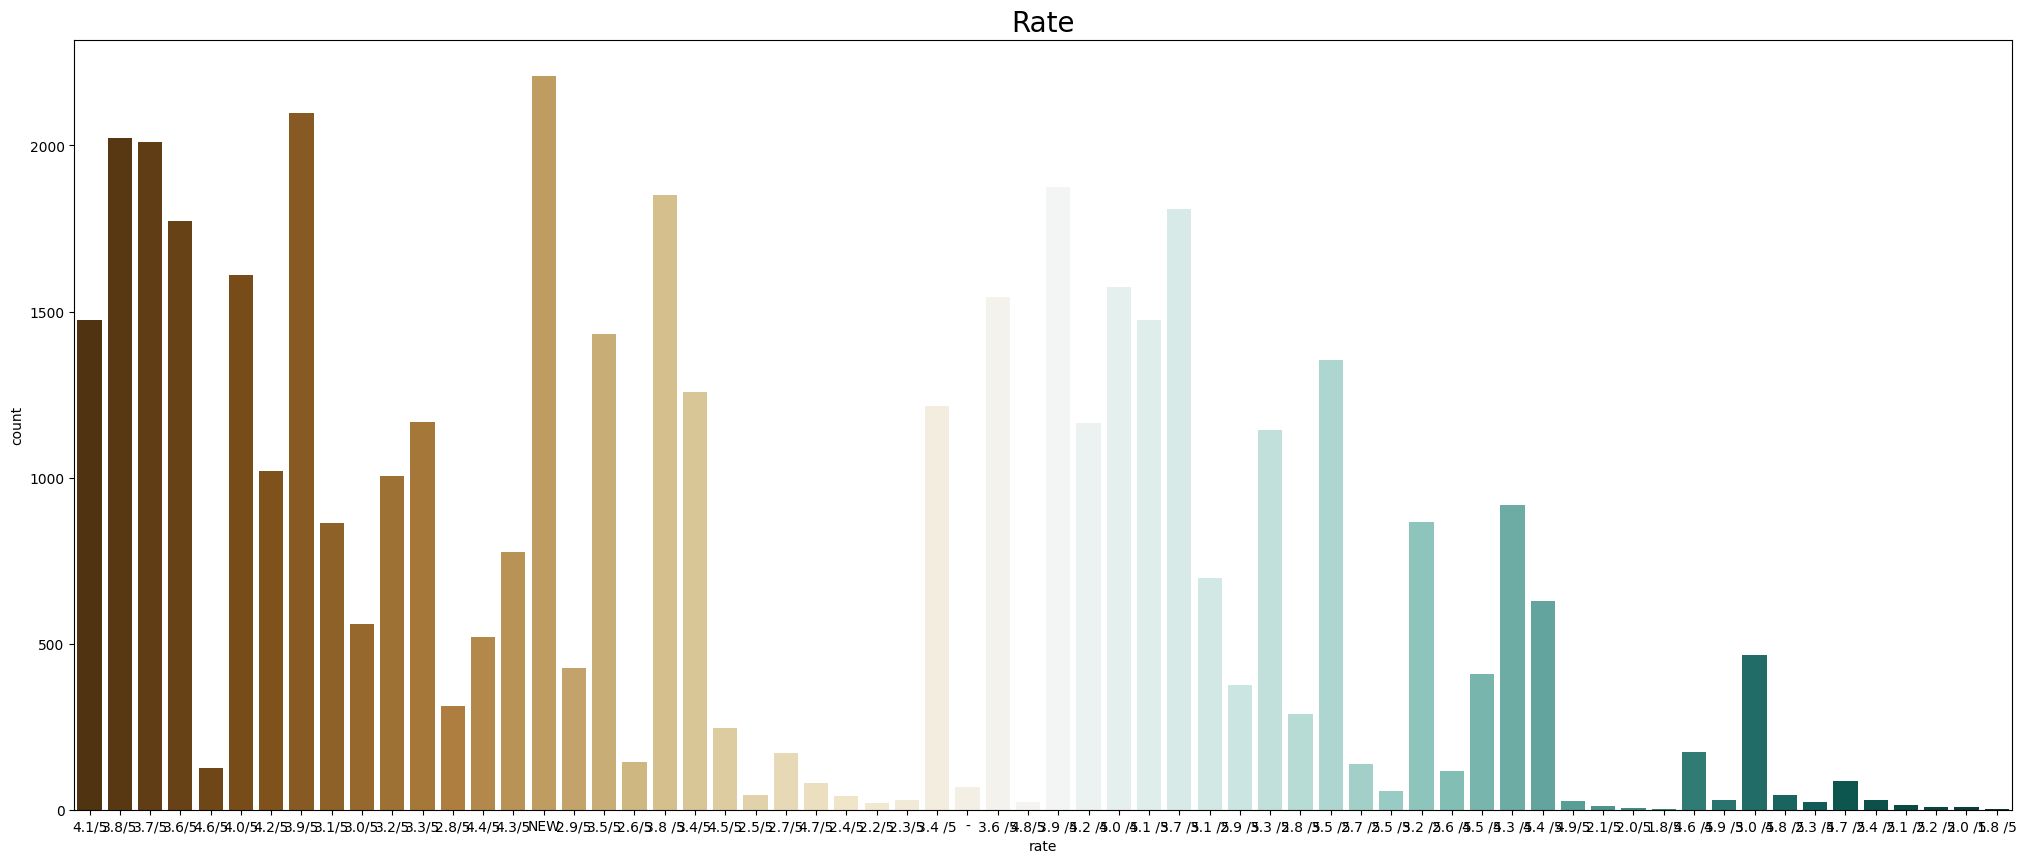

In [16]:
# Rate distribution
plt.figure(figsize=(25, 10))
sns.countplot(x=df['rate'],palette='BrBG')
plt.title('Rate',fontsize=20)
plt.show()

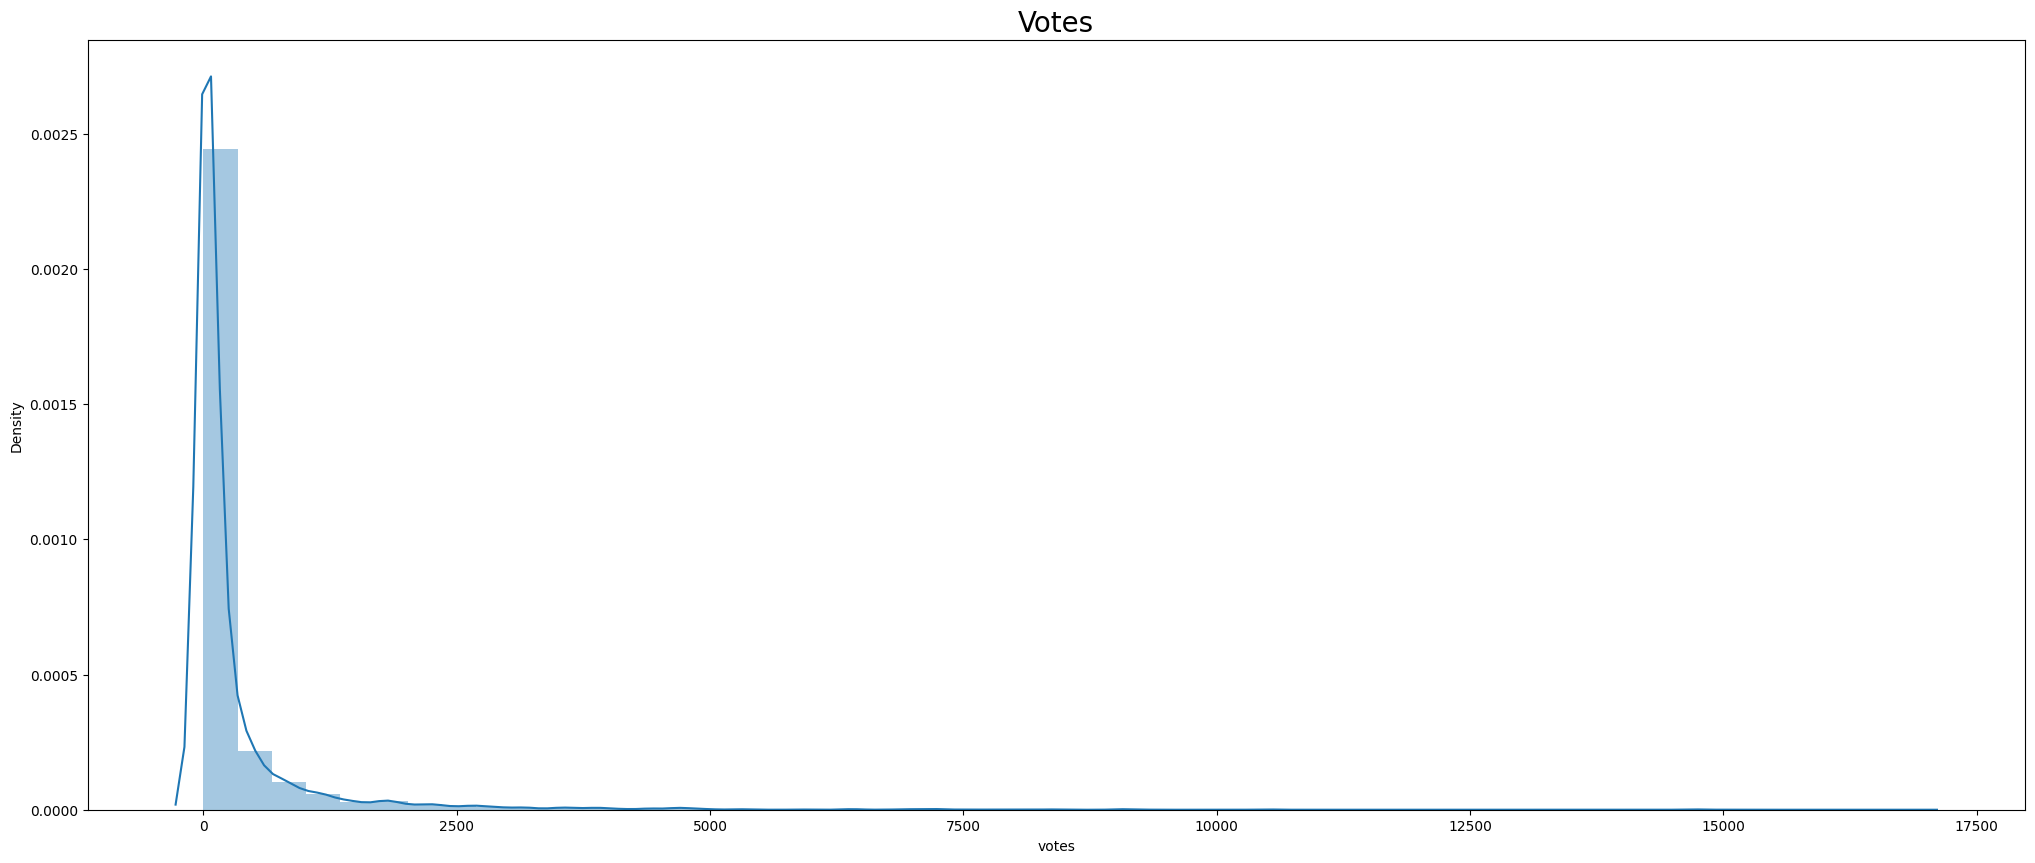

In [17]:
# Votes distribution
plt.figure(figsize=(25, 10))
sns.distplot(df['votes'])
plt.title('Votes',fontsize=20)
plt.show()

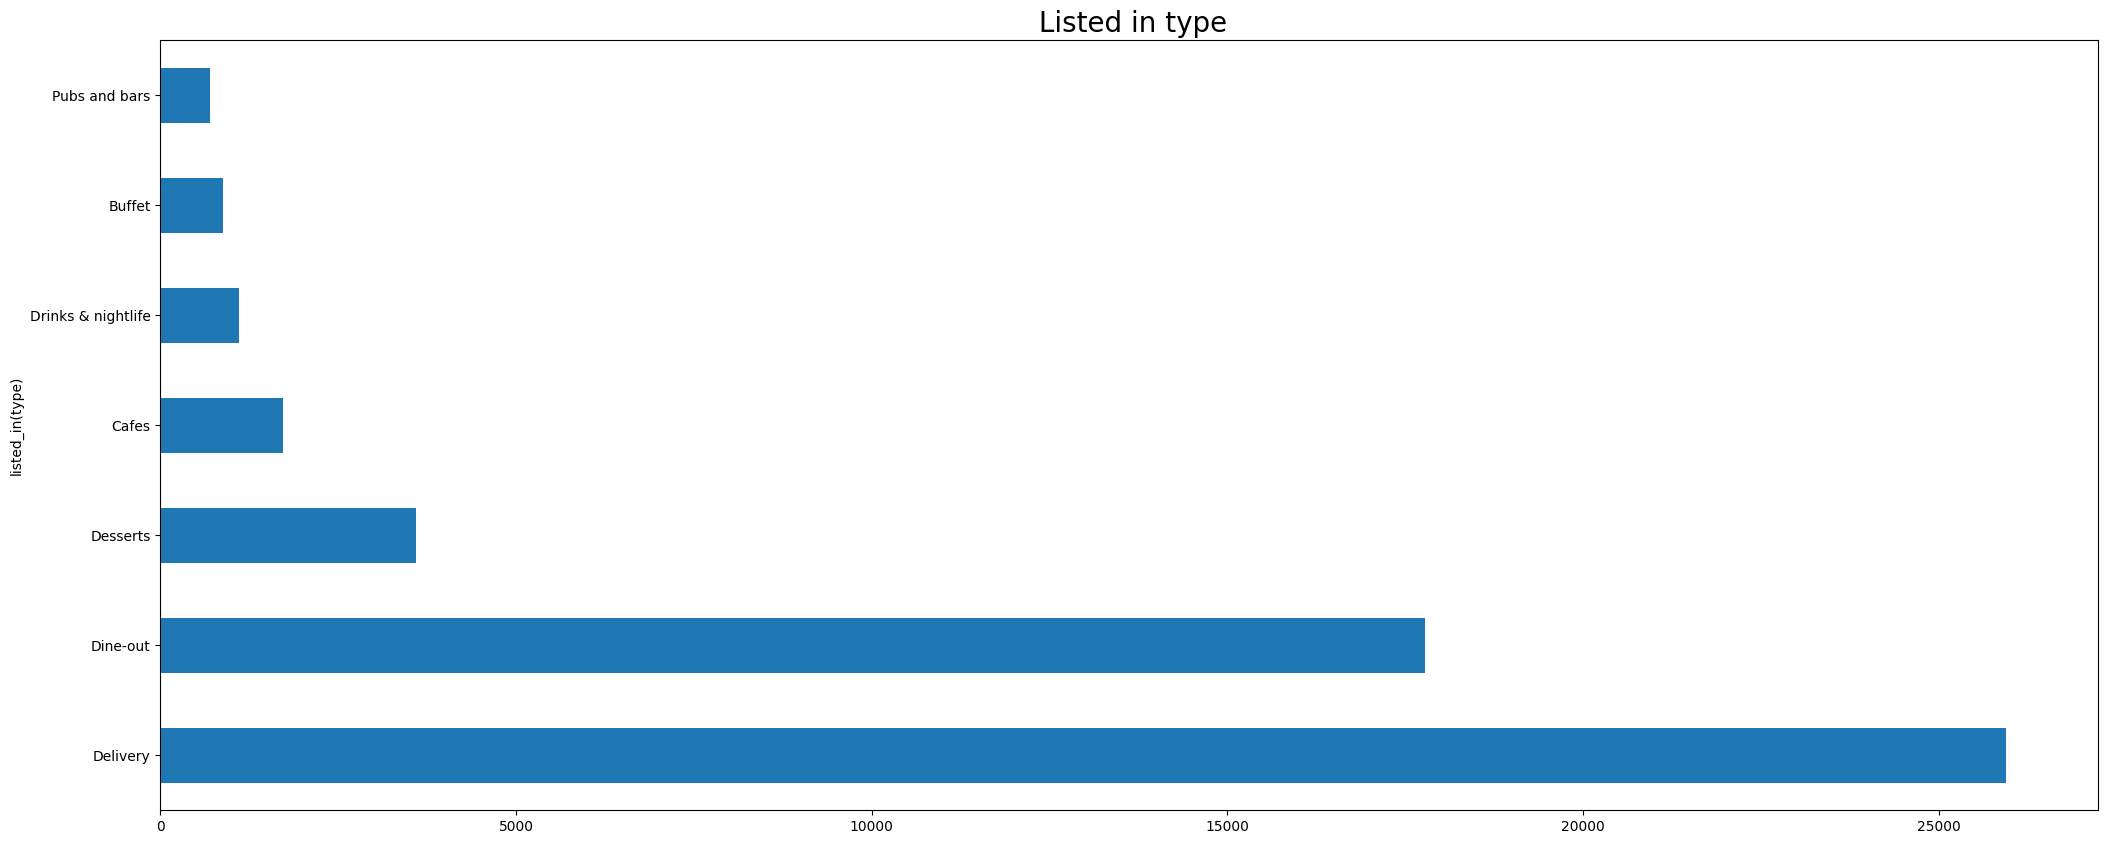

In [18]:
# Listed in type
plt.figure(figsize=(25,10))
df['listed_in(type)'].value_counts()[:].plot(kind='barh')
plt.title(' Listed in type',fontsize=20)
plt.show()

* Delivery of food is more that is 50.2% and Dine-out is 34.4% compare to others listed in type

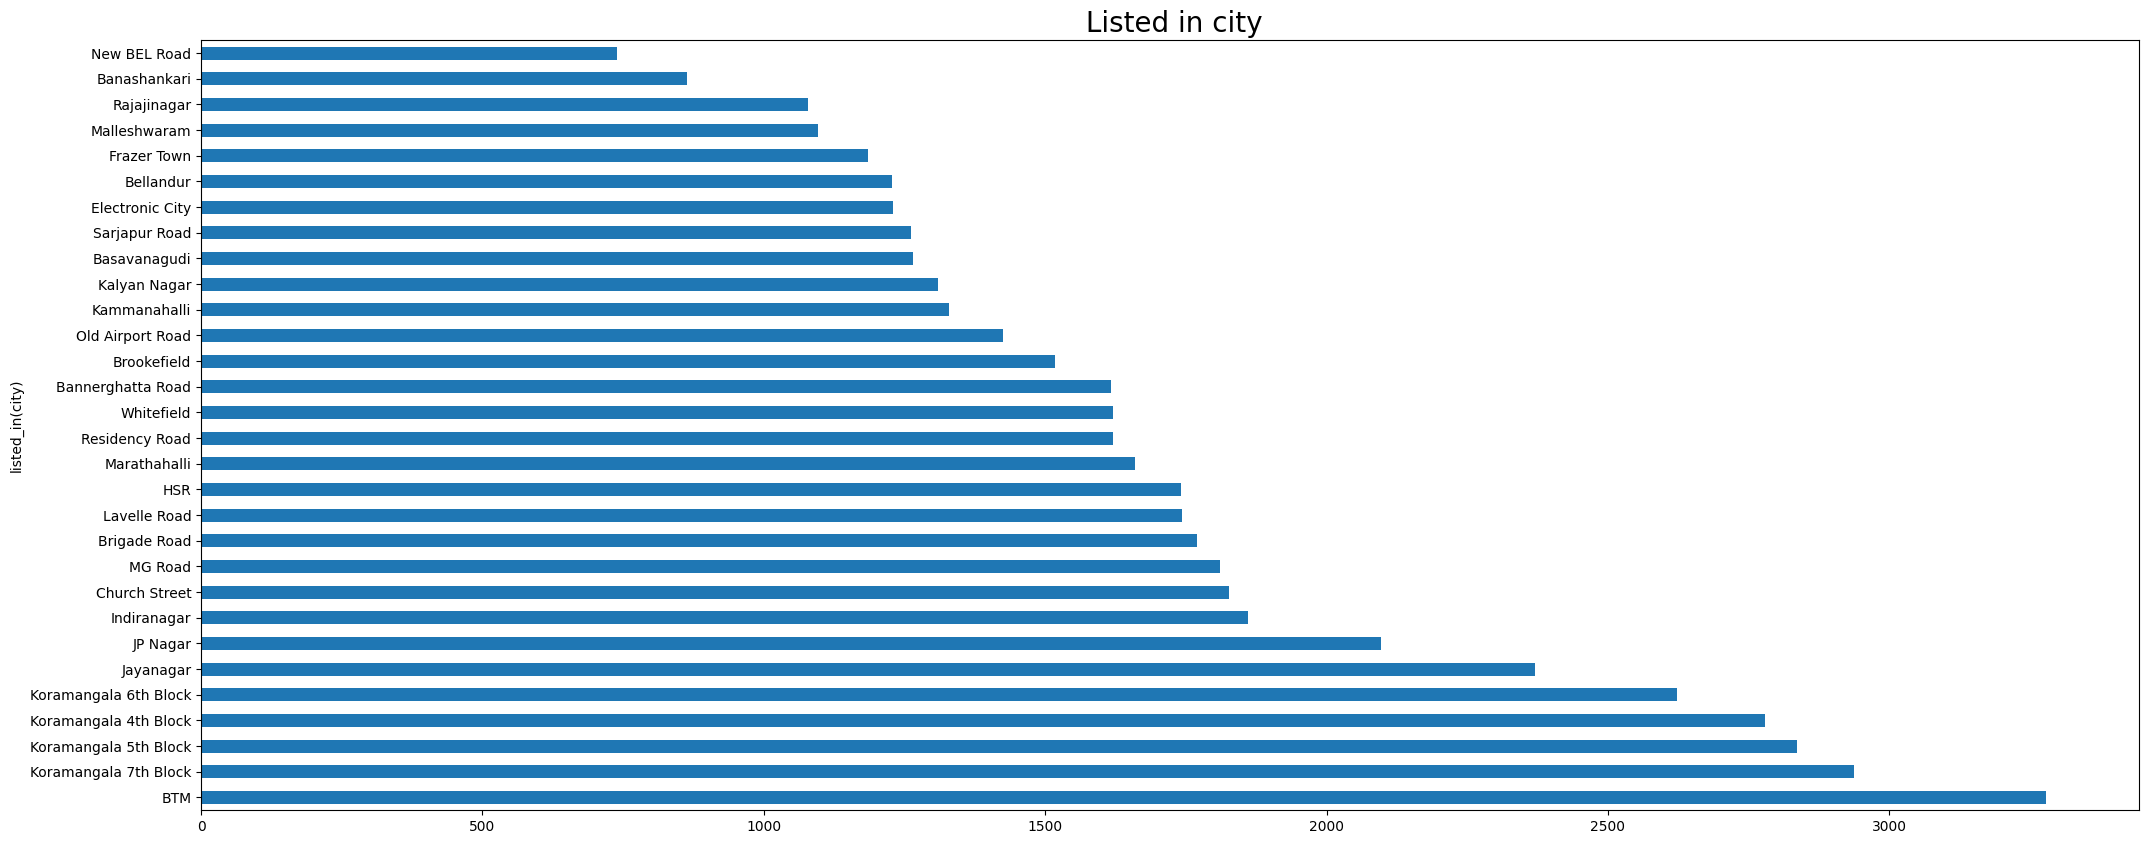

In [19]:
# Listed in city
plt.figure(figsize=(25,10))
df['listed_in(city)'].value_counts()[:].plot(kind='barh')
plt.title(' Listed in city',fontsize=20)
plt.show()

* In listed city BTM and koramangala has more restaurant than compare to other locations.

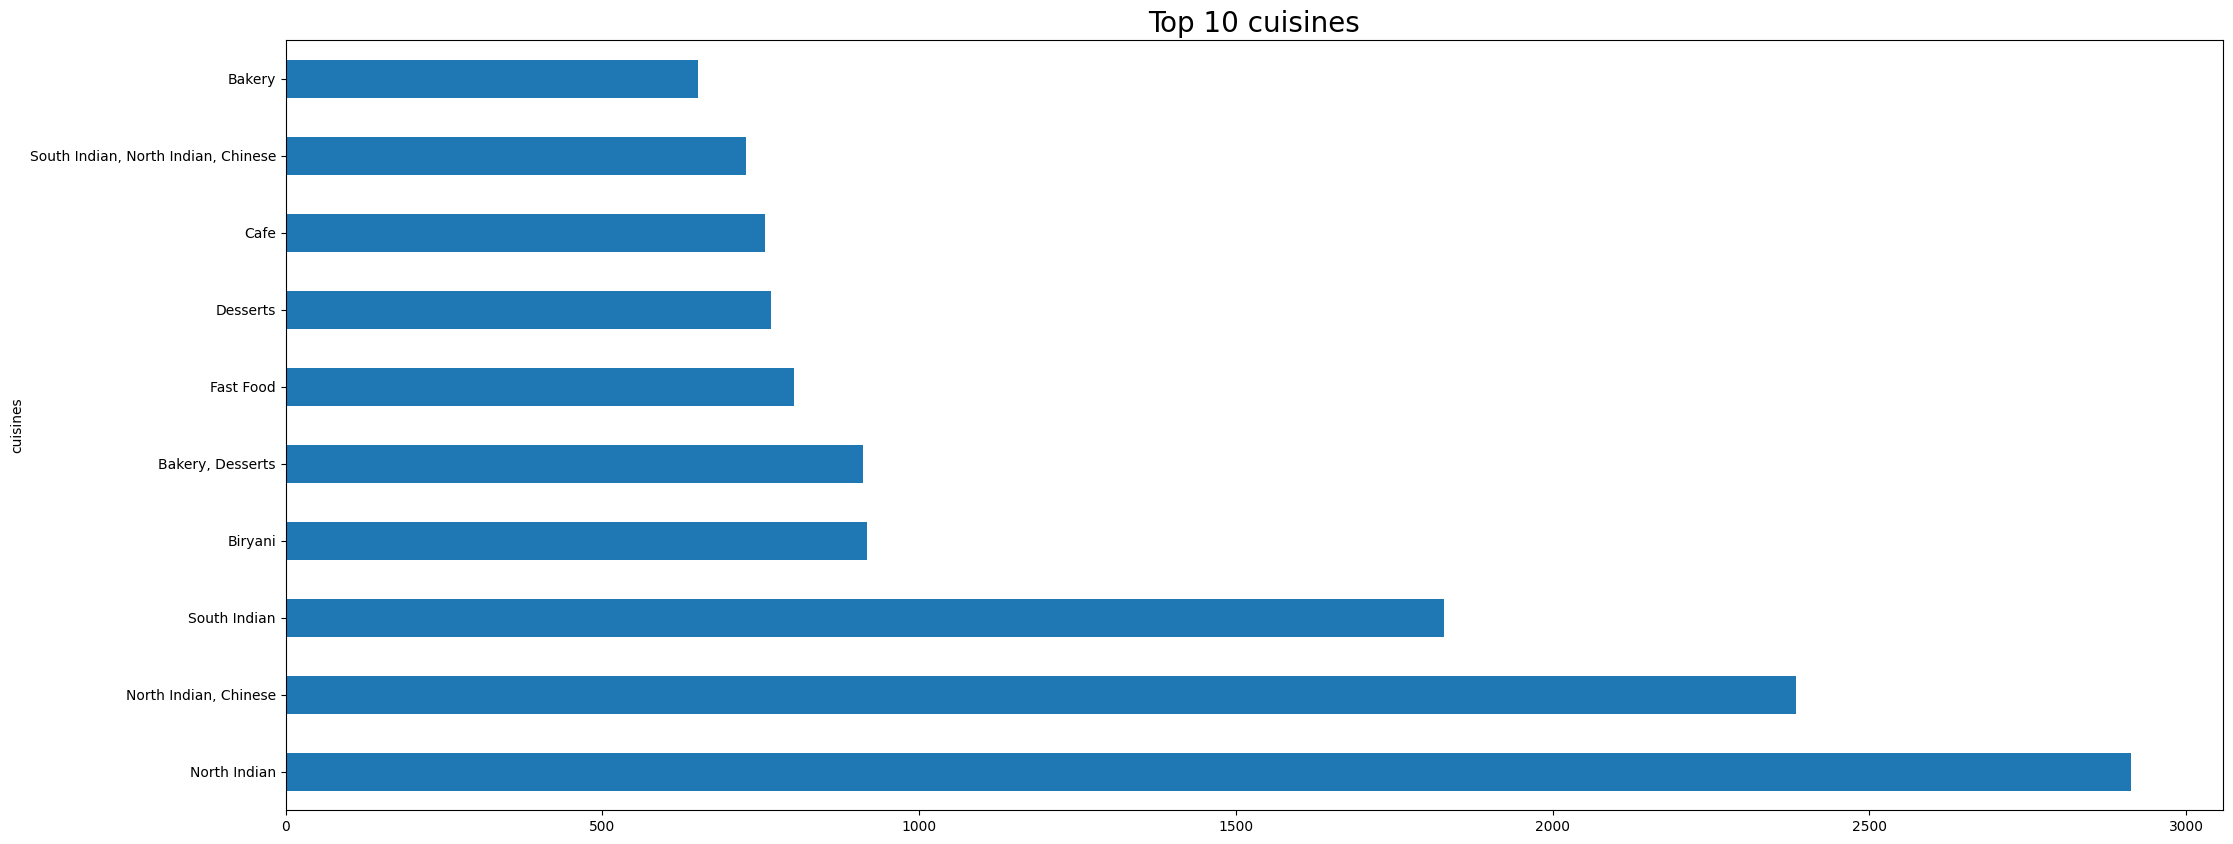

In [20]:
# Top 10 cuisines
plt.figure(figsize=(25,10))
df['cuisines'].value_counts()[:10].plot(kind='barh')
plt.title('Top 10 cuisines', fontsize=20)
plt.show()

* North Indian, North Indian Chinese and South India has more cusines than compare to other cuisines.

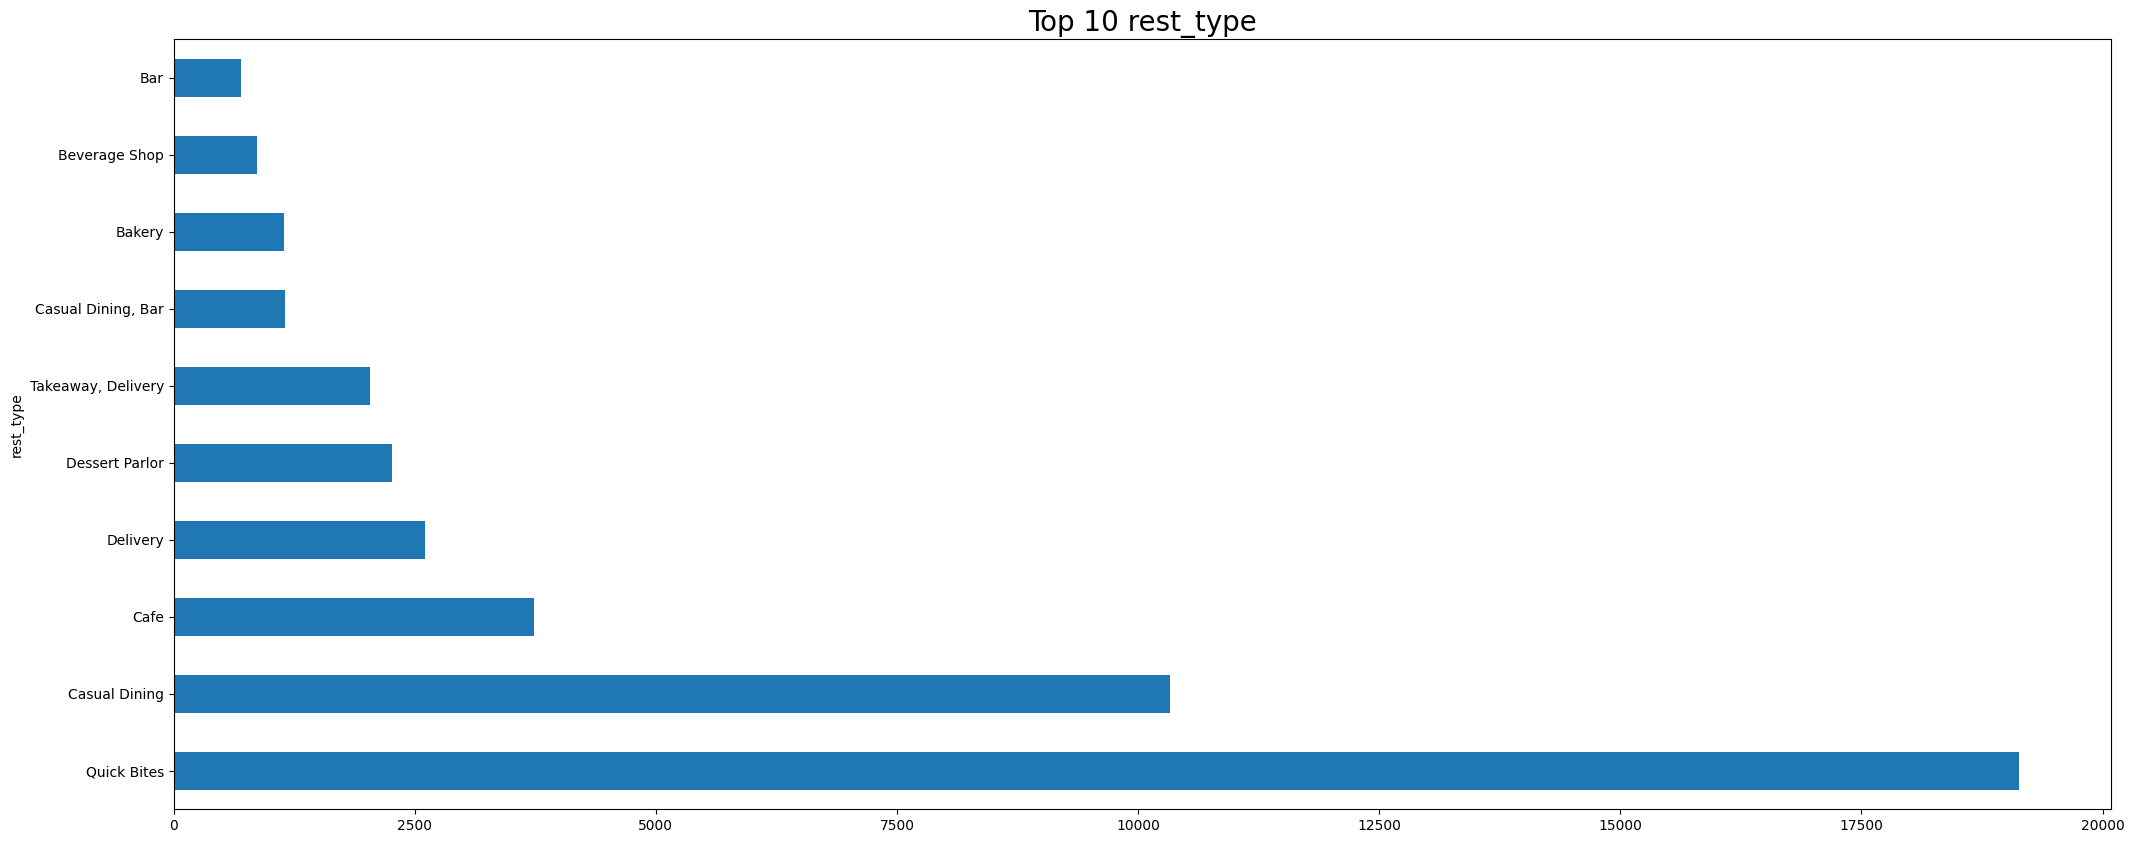

In [21]:
# Top 10 rest_type
plt.figure(figsize=(25,10))
df['rest_type'].value_counts()[:10].plot(kind='barh')
plt.title('Top 10 rest_type', fontsize=20)
plt.show()

* Quick Bites and Casual Dining are more restaurant types.

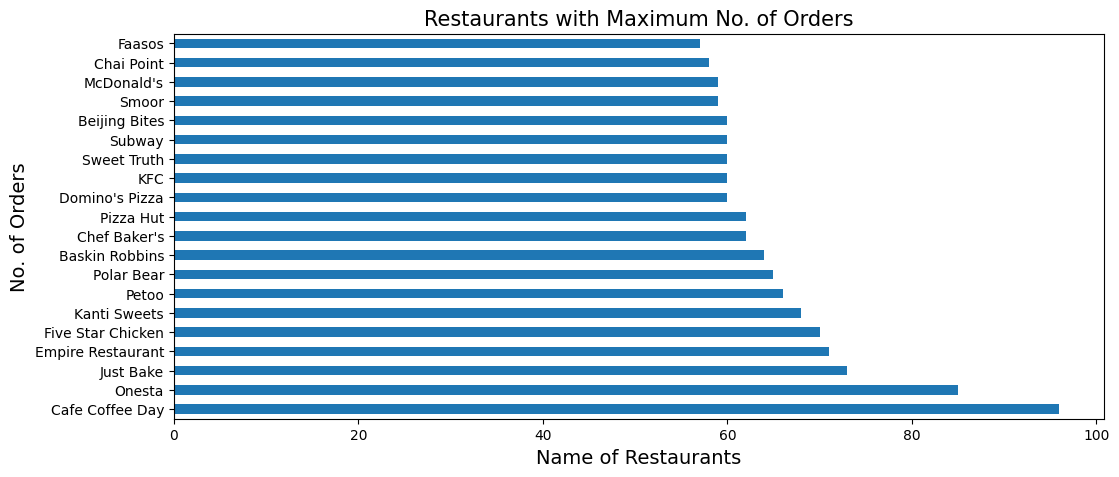

In [22]:
# Restaurants with Maximum No. of Orders
plt.figure(figsize = (12,5))
df['name'].value_counts()[:20].plot(kind='barh')
plt.xlabel('Name of Restaurants', size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title("Restaurants with Maximum No. of Orders", fontsize=15)
plt.show()

* Top 20 restaurant in the city

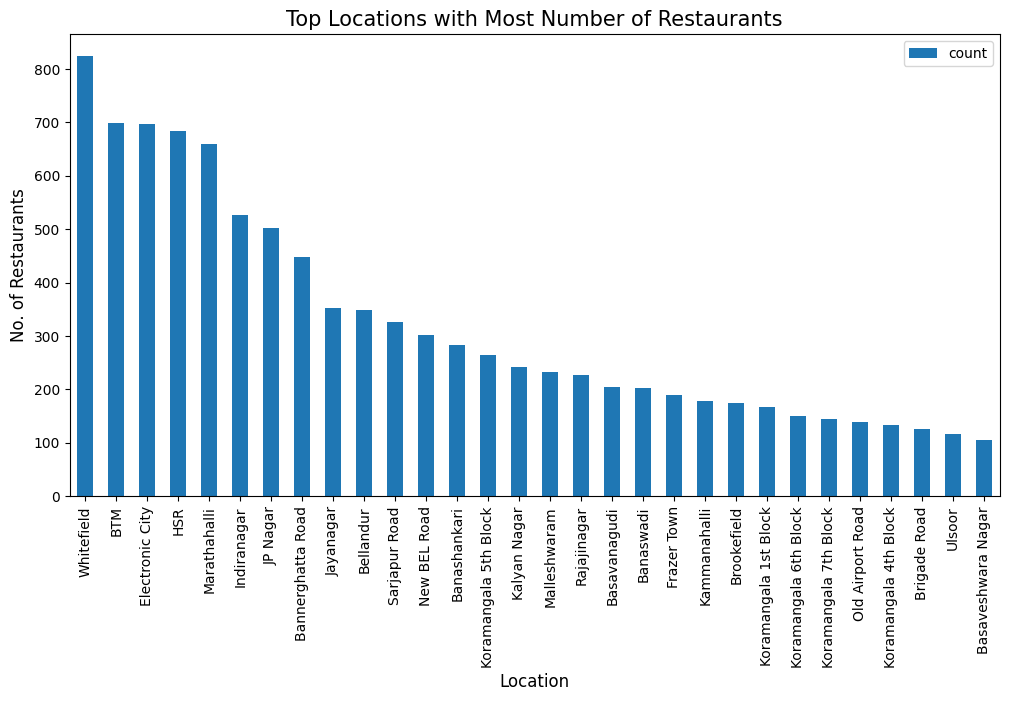

In [23]:
#Top Locations with Most Number of Restaurants
top_areas = pd.DataFrame(df.groupby(by='location')['name'].nunique())
top_areas.columns = ['count']
top_areas.sort_values(by='count', ascending= False, inplace=True)
plt.rcParams['figure.figsize'] = (12,6)
ax = top_areas[0:30].plot(kind='bar')
plt.xlabel('Location', size = 12)
plt.ylabel('No. of Restaurants', size = 12)
plt.title('Top Locations with Most Number of Restaurants', size = 15)
plt.show()

* Top 20 famous restaurant location types in the city.

<Figure size 1200x500 with 0 Axes>

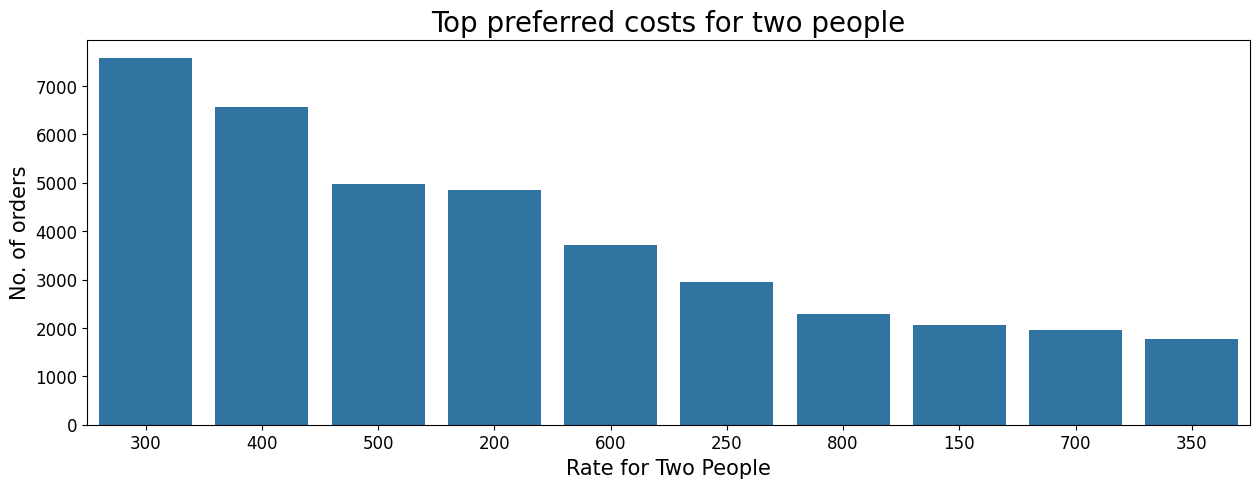

In [24]:
plt.figure(figsize = (12,5))
data = pd.DataFrame(df["approx_cost(for two people)"].value_counts().reset_index()[:10])
data.columns = ['approx_cost(for two people)', 'count']
data = data.set_index('approx_cost(for two people)')
plt.figure(figsize = (15, 5))
sns.barplot(x = data.index, y = data['count'])
plt.xlabel('Rate for Two People', size=15)
plt.ylabel('No. of orders', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Top preferred costs for two people', size = 20)
plt.show()

* Top preferred cost rate for Two people are 300 and no of orders are 7000.

In [25]:
df = df.rename(columns={'approx_cost(for two people)':'cost_for_two_people','listed_in(type)':'type','listed_in(city)':'city'})

In [26]:
#deleting unnecessary columns
df=df.drop(['url','address','name','phone','reviews_list','city'],axis=1)

In [27]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two_people,menu_item,type
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet


### Encoding Columns

In [28]:
#Online order column
df['online_order']=df['online_order'].replace({'Yes':1,'No':0})

In [29]:
df['book_table'] = df['book_table'].replace({"Yes": 1, "No" : 0})

In [30]:
le = LabelEncoder()

In [31]:
# Separate encoders for each column
le_location = LabelEncoder()
le_rest_type = LabelEncoder()
le_cuisines = LabelEncoder()
le_menu_item = LabelEncoder()
le_type = LabelEncoder()

In [32]:
# Fit and transform each column with its own encoder
df['location'] = le_location.fit_transform(df['location'])
df['rest_type'] = le_rest_type.fit_transform(df['rest_type'])
df['cuisines'] = le_cuisines.fit_transform(df['cuisines'])
df['menu_item'] = le_menu_item.fit_transform(df['menu_item'])
df['type'] = le_type.fit_transform(df['type'])

In [33]:
# Checking the unique values in the Rate column of the Dataset
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [34]:
# Replacing all the null values and garbage values and making it to be converted into numbers
df['rate'] =  df['rate'].str.replace("/5", "")
df['rate'] =  df['rate'].str.replace("nan", "NaN")
df['rate'] =  df['rate'].str.replace("NEW", "NaN")
df['rate'] =  df['rate'].str.replace("-", "NaN")
df['rate'] =  df['rate'].str.replace(" /5", "")
df['rate'] =  df['rate'].fillna(np.nan)
df['rate'] =  df['rate'].str.replace(" ", "")

In [35]:
# Verifying the results
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [36]:
# Changing the Datatype of Rate column from object to float
df['rate'] = df['rate'].astype(float)

In [37]:
# Replacing the null values and make it able to convert
df['cost_for_two_people'] =  df['cost_for_two_people'].str.replace("nan", "NaN")
df['cost_for_two_people'] =  df['cost_for_two_people'].fillna('NaN')
df['cost_for_two_people'] =  df['cost_for_two_people'].str.replace(",", "")

In [38]:
df['cost_for_two_people']=df['cost_for_two_people'].astype('float')

In [39]:
df.head(2)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two_people,menu_item,type
0,1,1,4.1,775,1,27,2159,800.0,9097,0
1,1,0,4.1,787,1,27,952,800.0,9097,0


In [40]:
df.isnull().sum()

,0
online_order,0
book_table,0
rate,10052
votes,0
location,0
rest_type,0
cuisines,0
cost_for_two_people,346
menu_item,0
type,0


In [41]:
df=df.dropna()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41418 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   online_order         41418 non-null  int64  
 1   book_table           41418 non-null  int64  
 2   rate                 41418 non-null  float64
 3   votes                41418 non-null  int64  
 4   location             41418 non-null  int64  
 5   rest_type            41418 non-null  int64  
 6   cuisines             41418 non-null  int64  
 7   cost_for_two_people  41418 non-null  float64
 8   menu_item            41418 non-null  int64  
 9   type                 41418 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 3.5 MB


In [43]:
# Define X (features) and y (target)
X = df.drop(['rate','menu_item'], axis=1)
y = df['rate']

In [44]:
X

,online_order,book_table,votes,location,rest_type,cuisines,cost_for_two_people,type
0,1,1,775,1,27,2159,800.0,0
1,1,0,787,1,27,952,800.0,0
2,1,0,918,1,22,766,800.0,0
3,0,0,88,1,78,2555,300.0,0
4,0,0,166,4,27,2188,600.0,0
...,...,...,...,...,...,...,...,...
51709,0,0,34,89,28,2041,800.0,6
51711,0,0,81,89,28,115,800.0,6
51712,0,0,27,89,8,1009,1500.0,6
51715,0,1,236,26,8,1391,2500.0,6


In [45]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
X_train

,online_order,book_table,votes,location,rest_type,cuisines,cost_for_two_people,type
8150,0,0,84,89,53,1823,400.0,4
37031,0,0,39,46,78,1693,250.0,4
29558,1,0,523,44,27,987,500.0,2
40614,1,0,172,56,78,2330,400.0,2
8983,1,0,166,45,78,1256,300.0,2
...,...,...,...,...,...,...,...,...
7790,1,0,205,56,78,1823,350.0,4
14168,1,0,11,19,27,2463,400.0,4
47555,1,1,1258,81,28,218,1700.0,2
1007,1,0,23,29,78,2359,150.0,2


##**Model Building**

###Linear Regression

In [47]:
# Initialize the Linear Regression model
model = LinearRegression()

In [48]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predict on the test set
y_pred = model.predict(X_test)

In [50]:
y_pred_train_linear=model.predict(X_train)
y_pred_test_linear=model.predict(X_test)

In [51]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_linear_train= mean_squared_error(y_train, y_pred_train_linear)
print("MSE :",MSE_linear_train)

#calculate RMSE
RMSE_linear_train=np.sqrt(MSE_linear_train)
print("RMSE :",RMSE_linear_train)

#calculate MAE
MAE_linear_train= mean_absolute_error(y_train, y_pred_train_linear)
print("MAE :",MAE_linear_train)

#calculate r2 and adjusted r2
R2_linear_train= r2_score(y_train, y_pred_train_linear)
print("R2 :",R2_linear_train)
Adjusted_R2_linear_train = (1-(1-r2_score(y_train, y_pred_train_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_linear_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_linear_test= mean_squared_error(y_test, y_pred_test_linear)
print("MSE :",MSE_linear_test)

#calculate RMSE
RMSE_linear_test=np.sqrt(MSE_linear_test)
print("RMSE :",RMSE_linear_test)

#calculate MAE
MAE_linear_test= mean_absolute_error(y_test, y_pred_test_linear)
print("MAE :",MAE_linear_test)

#calculate r2 and adjusted r2
R2_linear_test= r2_score(y_test, y_pred_test_linear)
print("R2 :",R2_linear_test)
Adjusted_R2_linear_test = (1-(1-r2_score(y_test, y_pred_test_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_linear_test)

Evaluation metrics for training data

MSE : 0.13460858054174568
RMSE : 0.3668904203461105
MAE : 0.28406295834030504
R2 : 0.30342075186444806
Adjusted R2 : 0.30297196117546643
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 0.13883747955354045
RMSE : 0.37260901700514504
MAE : 0.2866657732400542
R2 : 0.29235979711509763
Adjusted R2 : 0.291903880096246


###Decision Tree

In [52]:
#Fit Model
dec_regressor = DecisionTreeRegressor(max_depth=10,max_features=10, max_leaf_nodes=200,random_state=0)
dec_regressor=dec_regressor.fit(X_train, y_train)

In [53]:
#Predict train & test values
y_pred_train_dec = dec_regressor.predict(X_train)
y_pred_test_dec = dec_regressor.predict(X_test)

In [54]:
#checking the score
print("The train score is :", round(dec_regressor.score(X_train, y_train),2))
print("The test score is :", round(dec_regressor.score(X_test, y_test),2))

The train score is : 0.59
The test score is : 0.55


In [55]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_dec_train= mean_squared_error(y_train, y_pred_train_dec)
print("MSE :",MSE_dec_train)

#calculate RMSE
RMSE_dec_train=np.sqrt(MSE_dec_train)
print("RMSE :",RMSE_dec_train)

#calculate MAE
MAE_dec_train= mean_absolute_error(y_train, y_pred_train_dec)
print("MAE :",MAE_dec_train)

#calculate r2 and adjusted r2
R2_dec_train= r2_score(y_train,y_pred_train_dec)
print("R2 :",R2_dec_train)
Adjusted_R2_dec_train = (1-(1-r2_score(y_train, y_pred_train_dec))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_dec_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_dec_test= mean_squared_error(y_test, y_pred_test_dec)
print("MSE :",MSE_dec_test)

#calculate RMSE
RMSE_dec_test=np.sqrt(MSE_dec_test)
print("RMSE :",RMSE_dec_test)

#calculate MAE
MAE_dec_test= mean_absolute_error(y_test, y_pred_test_dec)
print("MAE :",MAE_dec_test)

#calculate r2 and adjusted r2
R2_dec_test= r2_score(y_test, y_pred_test_dec)
print("R2 :",R2_dec_test)
Adjusted_R2_dec_test = (1-(1-r2_score(y_test, y_pred_test_dec))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_dec_test)

Evaluation metrics for training data

MSE : 0.07871338556891444
RMSE : 0.28055905896783023
MAE : 0.20147395321537148
R2 : 0.5926700161525442
Adjusted R2 : 0.5924075824027835
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 0.08758957138568056
RMSE : 0.2959553537033594
MAE : 0.21169275638457954
R2 : 0.5535650584749897
Adjusted R2 : 0.5532774302610732


###Random Forest Regressor

In [56]:
# #creating paramdict to check random forest with diffirent value of parameter through gridsearch
rf_model= RandomForestRegressor()
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [57]:
#Fit Model
rf_regressor= GridSearchCV(rf_model,param_grid=params,verbose=0)
rf_regressor=rf_regressor.fit(X_train,y_train)

In [58]:
optimal_rf_model=rf_regressor.best_estimator_

In [59]:
#Predict train & test values
y_pred_train_rf = optimal_rf_model.predict(X_train)
y_pred_test_rf = optimal_rf_model.predict(X_test)

In [60]:
#checking the score
print("The train score is :", round(optimal_rf_model.score(X_train, y_train),2))
print("The test score is :", round(optimal_rf_model.score(X_test, y_test),2))

The train score is : 0.58
The test score is : 0.55


In [61]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_rf_train= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE_rf_train)

#calculate RMSE
RMSE_rf_train=np.sqrt(MSE_rf_train)
print("RMSE :",RMSE_rf_train)

#calculate MAE
MAE_rf_train= mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",MAE_rf_train)

#calculate r2 and adjusted r2
R2_rf_train= r2_score(y_train,y_pred_train_rf)
print("R2 :",R2_rf_train)
Adjusted_R2_rf_train = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_rf_test= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE_rf_test)

#calculate RMSE
RMSE_rf_test=np.sqrt(MSE_rf_test)
print("RMSE :",RMSE_rf_test)

#calculate MAE
MAE_rf_test= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_rf_test)

#calculate r2 and adjusted r2
R2_rf_test= r2_score(y_test, y_pred_test_rf)
print("R2 :",R2_rf_test)
Adjusted_R2_rf_test = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_rf_test)

Evaluation metrics for training data

MSE : 0.08102603915418796
RMSE : 0.2846507318701077
MAE : 0.20853384139824477
R2 : 0.580702380143425
Adjusted R2 : 0.5804322359090002
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 0.08882852980109679
RMSE : 0.29804115454261815
MAE : 0.2161220905145901
R2 : 0.5472502162056658
Adjusted R2 : 0.5469585194777642


###Gradient Boosting Regressor

In [62]:
# Create an instance of the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()
gb_regressor=gb_regressor.fit(X_train,y_train)

In [63]:
#Predict train & test values
y_pred_train_gb = gb_regressor.predict(X_train)
y_pred_test_gb = gb_regressor.predict(X_test)

In [64]:
#checking the score
print("The train score is :", round(gb_regressor.score(X_train, y_train),2))
print("The test score is :", round(gb_regressor.score(X_test, y_test),2))

The train score is : 0.54
The test score is : 0.51


In [65]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_gb_train= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE_gb_train)

#calculate RMSE
RMSE_gb_train=np.sqrt(MSE_gb_train)
print("RMSE :",RMSE_gb_train)

#calculate MAE
MAE_gb_train= mean_absolute_error(y_train, y_pred_train_gb)
print("MAE :",MAE_gb_train)

#calculate r2 and adjusted r2
R2_gb_train= r2_score(y_train,y_pred_train_gb)
print("R2 :",R2_gb_train)
Adjusted_R2_gb_train = (1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gb_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_gb_test= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE_gb_test)

#calculate RMSE
RMSE_gb_test=np.sqrt(MSE_gb_test)
print("RMSE :",RMSE_gb_test)

#calculate MAE
MAE_gb_test= mean_absolute_error(y_test, y_pred_test_gb)
print("MAE :",MAE_gb_test)

#calculate r2 and adjusted r2
R2_gb_test= r2_score(y_test, y_pred_test_gb)
print("R2 :",R2_gb_test)
Adjusted_R2_gb_test = (1-(1-r2_score(y_test, y_pred_test_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_gb_test)

Evaluation metrics for training data

MSE : 0.08923538840652112
RMSE : 0.2987229291609888
MAE : 0.2136063477462367
R2 : 0.5382202270231865
Adjusted R2 : 0.5379227124718604
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 0.09657799199998633
RMSE : 0.3107699985519618
MAE : 0.22089780087383523
R2 : 0.5077520128364787
Adjusted R2 : 0.5074348682848714


###XGBoost

In [66]:
# Initialize the XGBoost model
xgb_model_without_cv = XGBRegressor(n_estimators=100, max_depth=6)

In [67]:
# Fit the model on the training data
xgb_model_without_cv.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:
# Make predictions on the training and testing sets
y_pred_train_xgb_without_cv = xgb_model_without_cv.predict(X_train)
y_pred_test_xgb_without_cv = xgb_model_without_cv.predict(X_test)

In [69]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_xgb_train= mean_squared_error(y_train, y_pred_train_xgb_without_cv)
print("MSE :",MSE_xgb_train)

#calculate RMSE
RMSE_xgb_train=np.sqrt(MSE_xgb_train)
print("RMSE :",RMSE_xgb_train)

#calculate MAE
MAE_xgb_train= mean_absolute_error(y_train, y_pred_train_xgb_without_cv)
print("MAE :",MAE_xgb_train)

#calculate r2 and adjusted r2
R2_xgb_train= r2_score(y_train,y_pred_train_xgb_without_cv)
print("R2 :",R2_xgb_train)
Adjusted_R2_xgb_train = (1-(1-r2_score(y_train, y_pred_train_xgb_without_cv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_xgb_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_xgb_test= mean_squared_error(y_test, y_pred_test_xgb_without_cv)
print("MSE :",MSE_xgb_test)

#calculate RMSE
RMSE_xgb_test=np.sqrt(MSE_xgb_test)
print("RMSE :",RMSE_xgb_test)

#calculate MAE
MAE_xgb_test= mean_absolute_error(y_test, y_pred_test_xgb_without_cv)
print("MAE :",MAE_xgb_test)

#calculate r2 and adjusted r2
R2_xgb_test= r2_score(y_test, y_pred_test_xgb_without_cv)
print("R2 :",R2_xgb_test)
Adjusted_R2_xgb_test = (1-(1-r2_score(y_test, y_pred_test_xgb_without_cv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_xgb_test)

Evaluation metrics for training data

MSE : 0.037363870327655056
RMSE : 0.1932973624436067
MAE : 0.1330163376204357
R2 : 0.806647565886778
Adjusted R2 : 0.8065229931660801
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 0.050639698796582255
RMSE : 0.22503266162177937
MAE : 0.15398949947829946
R2 : 0.7418947185898406
Adjusted R2 : 0.741728427033806


### Xgboost with cv

In [70]:
# #creating paramdict to check XGBoost with diffirent value of parameter through gridsearch
xgb_model=XGBRegressor()
n_estimators = [50,80,100]
max_depth = [4,6,8]
min_child_weight = [1, 5, 10]
gamma = [0, 0.5, 1]
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_child_weight' : min_child_weight,'gamma' : gamma}

In [71]:
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_dict,cv = 5, verbose=2)
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END gamma=0, max_depth=4, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END gamma=0, max_depth=4, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END gamma=0, max_depth=4, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END gamma=0, max_depth=4, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END gamma=0, max_depth=4, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END gamma=0, max_depth=4, min_child_weight=1, n_estimators=80; total time=   0.2s
[CV] END gamma=0, max_depth=4, min_child_weight=1, n_estimators=80; total time=   0.2s
[CV] END gamma=0, max_depth=4, min_child_weight=1, n_estimators=80; total time=   0.2s
[CV] END gamma=0, max_depth=4, min_child_weight=1, n_estimators=80; total time=   0.2s
[CV] END gamma=0, max_depth=4, min_child_weight=1, n_estimators=80; total time=   0.2s
[CV] END gamma=0, max_depth=4, min_child_weight=1, n_estimators=100;

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [0, 0.5, 1], 'max_depth': [4, 6, 8],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [72]:
xgb_grid.best_params_

{'gamma': 0, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 100}

In [73]:
xgb_optimal_model = xgb_grid.best_estimator_

In [74]:
#Predict train & test values
y_pred_train_xgb = xgb_optimal_model.predict(X_train)
y_pred_test_xgb = xgb_optimal_model.predict(X_test)

In [75]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_xgb_train= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :",MSE_xgb_train)

#calculate RMSE
RMSE_xgb_train=np.sqrt(MSE_xgb_train)
print("RMSE :",RMSE_xgb_train)

#calculate MAE
MAE_xgb_train= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :",MAE_xgb_train)

#calculate r2 and adjusted r2
R2_xgb_train= r2_score(y_train,y_pred_train_xgb)
print("R2 :",R2_xgb_train)
Adjusted_R2_xgb_train = (1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_xgb_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_xgb_test= mean_squared_error(y_test, y_pred_test_xgb)
print("MSE :",MSE_xgb_test)

#calculate RMSE
RMSE_xgb_test=np.sqrt(MSE_xgb_test)
print("RMSE :",RMSE_xgb_test)

#calculate MAE
MAE_xgb_test= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE_xgb_test)

#calculate r2 and adjusted r2
R2_xgb_test= r2_score(y_test, y_pred_test_xgb)
print("R2 :",R2_xgb_test)
Adjusted_R2_xgb_test = (1-(1-r2_score(y_test, y_pred_test_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_xgb_test)

Evaluation metrics for training data

MSE : 0.012078060215975123
RMSE : 0.10990022846188775
MAE : 0.07152855482454068
R2 : 0.9374978469402203
Adjusted R2 : 0.9374575781776788
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 0.02724625408598159
RMSE : 0.16506439375583576
MAE : 0.10161052427103069
R2 : 0.8611286748271573
Adjusted R2 : 0.8610392030866899


###Result of all models

In [76]:
list_of_model = ['Linear regression','Decision Tree','Random Forest','Gradient Boosting','Extreme Gradient Boosting']

In [77]:
result_list_MSE = [MSE_linear_test,MSE_dec_test,MSE_rf_test,MSE_gb_test,MSE_xgb_test]
result_list_RMSE = [RMSE_linear_test,RMSE_dec_test,RMSE_rf_test,RMSE_gb_test,RMSE_xgb_test]
result_list_MAE = [MAE_linear_test,MAE_dec_test,MAE_rf_test,MAE_gb_test,MAE_xgb_test]
result_list_R2 = [R2_linear_test,R2_dec_test,R2_rf_test,R2_gb_test,R2_xgb_test]
relust_list_adjusted_R2=[Adjusted_R2_linear_test,Adjusted_R2_dec_test,Adjusted_R2_rf_test,Adjusted_R2_gb_test,Adjusted_R2_xgb_test]

In [78]:
# creating an empty dataframe
results_df = pd.DataFrame()

In [79]:
#adding above lists to the empty dataframe
results_df['model_name'] = list_of_model
results_df['MSE_score'] = result_list_MSE
results_df['RMSE_score'] = result_list_RMSE
results_df['MAE_score'] = result_list_MAE
results_df['R2_score'] = result_list_R2
results_df['Adjusted_R2_score'] = relust_list_adjusted_R2

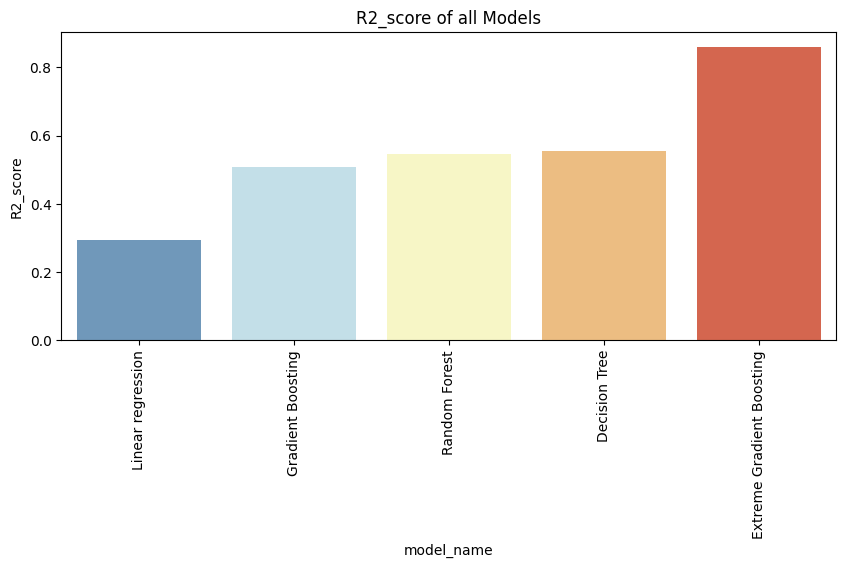

In [80]:
#creating bar plot to visualize the R2 of all the models
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x='model_name',y='R2_score',data=results_df.sort_values('R2_score'),palette="RdYlBu_r").set(title='R2_score of all Models')
plt.xticks(rotation=90);

* XGBoost with cross validation performs the best and hence we choose model for deployment

###Pickle file

In [81]:
import pickle
# Saving model to disk
pickle.dump(xgb_grid, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [82]:
# Save each encoder separately
pickle.dump(le_location, open('label_encoder_location.pkl', 'wb'))
pickle.dump(le_rest_type, open('label_encoder_rest_type.pkl', 'wb'))
pickle.dump(le_cuisines, open('label_encoder_cuisines.pkl', 'wb'))
pickle.dump(le_menu_item, open('label_encoder_menu_item.pkl', 'wb'))
pickle.dump(le_type, open('label_encoder_type.pkl', 'wb'))

### Summary:

In this project, the primary objective was to predict restaurant ratings based on various features from the Zomato dataset. The approach involved classic machine learning tasks such as Data Exploration, Data Cleaning, Feature Engineering, and Model Building. Extensive Exploratory Data Analysis (EDA) was performed to understand the dataset and draw insights for building the model.

Key insights from the EDA revealed that:
- **Online orders** are more frequent compared to offline orders, with around 30,000 online orders versus 23,000 offline orders.
- **Delivery** is the most preferred type of service (50.2%), followed by **Dine-out** (34.4%).
- Locations like **BTM** and **Koramangala** have the most restaurants compared to other areas.
- **North Indian**, **Chinese**, and **South Indian** cuisines are the most popular choices.
- The most common restaurant types are **Quick Bites** and **Casual Dining**.
- The top 20 restaurant locations and top 20 famous restaurants in the city were identified.
- The preferred cost for two people is **₹300**, with around 7,000 orders in that range.

Following the data analysis, the data was encoded and prepared for machine learning model building. Various regression models were implemented, including:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- XGBoost
- XGBoost with Cross-Validation (CV)

Among these models, **XGBoost with Cross-Validation** performed the best and was chosen for deployment. The final model and label encoders were saved as pickle files, and the solution was deployed using Flask.

### Conclusion:

This project successfully built a predictive model for restaurant ratings based on features such as online order availability, type of service, location, cuisine, and cost for two people. The insights gained from EDA helped in understanding customer preferences and trends in the restaurant industry. The **XGBoost with Cross-Validation** model was found to be the most effective and was deployed to provide rating predictions. This solution could help Zomato restaurants better understand the factors influencing their ratings and make data-driven decisions to improve their services.